In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


## If builded with Cmake

In [1]:
import sys
sys.path.append('../build')
import interpolation_bindings as interp


In [2]:
# import sys
# sys.path.append('../python_code')
# from interpolation import Interpolator, generate_data, calculate_errors, measure_execution_time, linear_interpolation, newton_interpolation, lagrange_interpolation, cubic_spline_interpolation

ModuleNotFoundError: No module named 'interpolation'

## If builded and installed via `setup.py`

In [1]:
from pytoolbox.interpolation import Interpolator, generate_data, calculate_errors, measure_execution_time, linear_interpolation, newton_interpolation, lagrange_interpolation, cubic_spline_interpolation

# Using the c++ Module

Real function to be interpolated

In [2]:
def func(x):
    return np.exp(x)

Data generation

In [5]:
a = -4
b = 4
num_test_points = 20
num_nodes = 6
x_test, y_test = generate_data(func, (a,b), num_test_points, exclude_extremes = True)
x_nodes, y_nodes = generate_data(func, (a,b), num_nodes)

In [6]:
print("Test points:", x_test)
print("Values of the function at the test points:", y_test)
print("\n" + "="*50 + "\n")
print("Nodes:", x_nodes)
print("Values of the function at the node points:", y_nodes)
print("\n" + "="*50 + "\n")

Test points: [-3.99999    -3.57893842 -3.15788684 -2.73683526 -2.31578368 -1.89473211
 -1.47368053 -1.05262895 -0.63157737 -0.21052579  0.21052579  0.63157737
  1.05262895  1.47368053  1.89473211  2.31578368  2.73683526  3.15788684
  3.57893842  3.99999   ]
Values of the function at the test points: [1.83158220e-02 2.79053062e-02 4.25154882e-02 6.47750187e-02
 9.86888128e-02 1.50358610e-01 2.29080794e-01 3.49018989e-01
 5.31752370e-01 8.10158161e-01 1.23432689e+00 1.88057460e+00
 2.86517362e+00 4.36527211e+00 6.65076646e+00 1.01328608e+01
 1.54380503e+01 2.35208401e+01 3.58354785e+01 5.45976041e+01]


Nodes: [-4.  -2.4 -0.8  0.8  2.4  4. ]
Values of the function at the node points: [1.83156389e-02 9.07179533e-02 4.49328964e-01 2.22554093e+00
 1.10231764e+01 5.45981500e+01]




Access the interpolator

In [7]:
interpolator = Interpolator(x_nodes, y_nodes)

Interpolation with number of nodes = 6

In [6]:
linear = np.array([interpolator.linear_interpolate(x) for x in x_test])
newton = np.array([interpolator.newton_interpolate(x) for x in x_test])
gsl_polynomial = np.array([interpolator.gsl_polynomial_interpolate(x) for x in x_test])
cubic_spline = np.array([interpolator.cubic_spline_interpolate(x) for x in x_test])

Calculation of the Mean Absolute Error (MAE) and efficiency for each method

In [7]:
_,_,mae_linear = calculate_errors(y_test, linear)
_,_,mae_newton = calculate_errors(y_test, newton)
_,_,mae_gsl_polynomial = calculate_errors(y_test, gsl_polynomial)
_,_,mae_cubic_spline = calculate_errors(y_test, cubic_spline)

In [8]:
time_linear = measure_execution_time(lambda: [interpolator.linear_interpolate(x) for x in x_test])
time_newton = measure_execution_time(lambda: [interpolator.newton_interpolate(x) for x in x_test])
time_gsl_polynomial= measure_execution_time(lambda: [interpolator.gsl_polynomial_interpolate(x) for x in x_test])
time_cubic_spline = measure_execution_time(lambda: [interpolator.cubic_spline_interpolate(x) for x in x_test])

In [9]:
methods = ["Linear Interpolation", "Newton Interpolation", "GSL Polynomial Interpolation", "Cubic Spline Interpolation"]
mae_values = [mae_linear, mae_newton, mae_gsl_polynomial, mae_cubic_spline]
efficiency = [time_linear, time_newton, time_gsl_polynomial, time_cubic_spline]
mae_table = pd.DataFrame({
    "Method": methods,
    "MAE": mae_values,
    "Efficiency": efficiency
})
print(mae_table)

                         Method       MAE  Efficiency
0          Linear Interpolation  1.281849    0.000114
1          Newton Interpolation  0.210644    0.000071
2  GSL Polynomial Interpolation  0.210644    0.000073
3    Cubic Spline Interpolation  0.240260    0.000077


Visualization of the various interpolations

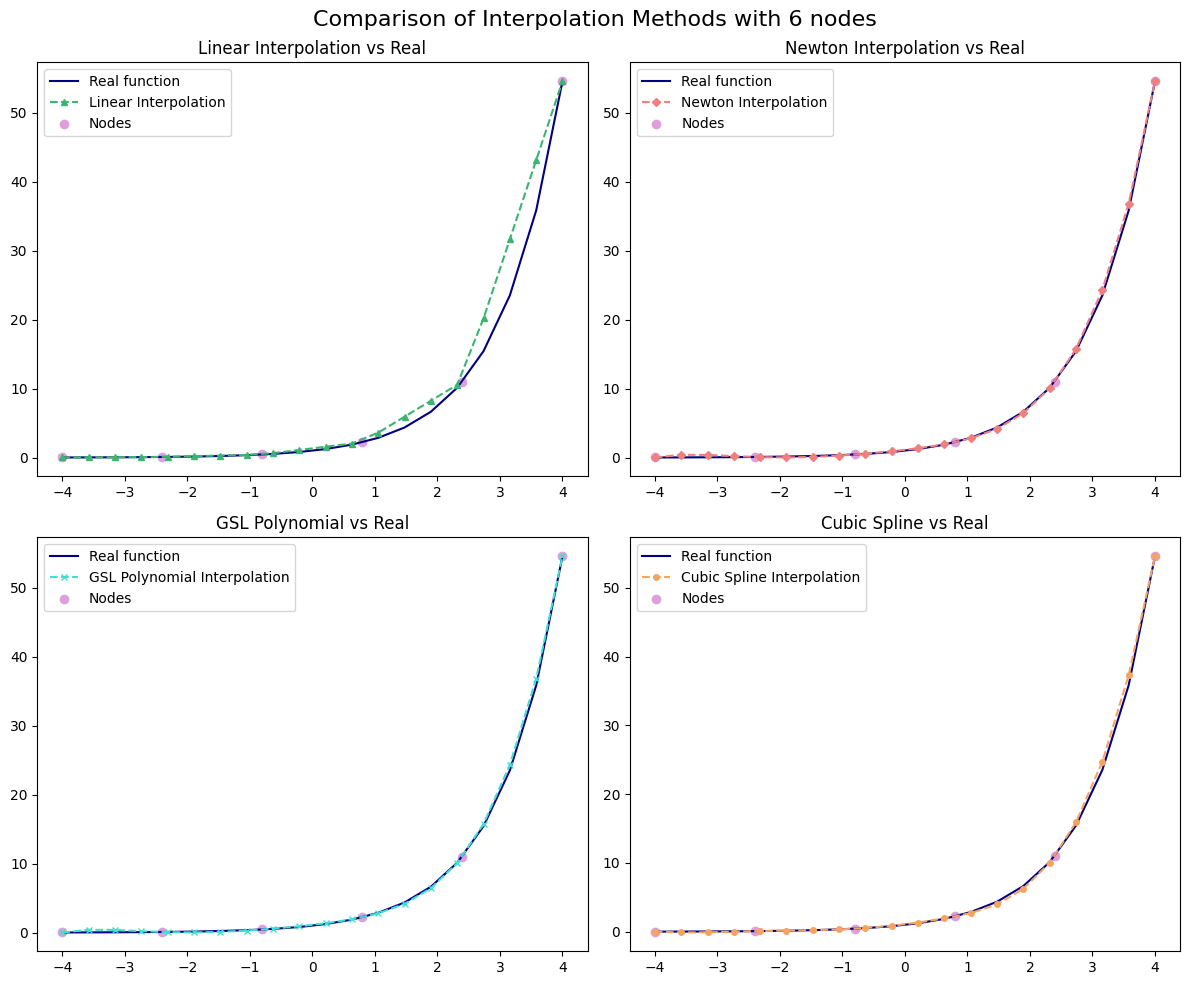

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle("Comparison of Interpolation Methods with 6 nodes", fontsize = 16)

axs[0, 0].plot(x_test, y_test, label="Real function", color="navy")
axs[0, 0].plot(x_test, linear, label="Linear Interpolation", color="mediumseagreen", linestyle="--", marker="^", markersize=4)
axs[0, 0].scatter(x_nodes, y_nodes, label = "Nodes", color = "plum")
axs[0, 0].set_title("Linear Interpolation vs Real")
axs[0, 0].legend()

axs[0, 1].plot(x_test, y_test, label="Real function", color="navy")
axs[0, 1].plot(x_test, newton, label="Newton Interpolation", color="lightcoral", linestyle="--", marker="D", markersize=4)
axs[0, 1].scatter(x_nodes, y_nodes, label = "Nodes", color = "plum")
axs[0, 1].set_title("Newton Interpolation vs Real")
axs[0, 1].legend()

axs[1, 0].plot(x_test, y_test, label="Real function", color="navy")
axs[1, 0].plot(x_test, gsl_polynomial, label="GSL Polynomial Interpolation", color="turquoise", linestyle="--", marker="x", markersize=4)
axs[1, 0].scatter(x_nodes, y_nodes, label = "Nodes", color = "plum")
axs[1, 0].set_title("GSL Polynomial vs Real")
axs[1, 0].legend()

axs[1, 1].plot(x_test, y_test, label="Real function", color="navy")
axs[1, 1].plot(x_test, cubic_spline, label="Cubic Spline Interpolation", color="sandybrown", linestyle="--", marker="o", markersize=4)
axs[1, 1].scatter(x_nodes, y_nodes, label = "Nodes", color = "plum")
axs[1, 1].set_title("Cubic Spline vs Real")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

from here, I think it is unnecessary!!!

In [11]:
linear_python = [linear_interpolation(x_nodes, y_nodes, x) for x in x_test]
newton_python = [newton_interpolation(x_nodes, y_nodes, x) for x in x_test]
lagrange_python = [lagrange_interpolation(x_nodes, y_nodes, x) for x in x_test]
spline_python = [cubic_spline_interpolation(x_nodes, y_nodes, x) for x in x_test]

In [12]:
_,_,mae_linear_python = calculate_errors(y_test, linear_python)
_,_,mae_newton_python = calculate_errors(y_test, newton_python)
_,_,mae_lagrange_python = calculate_errors(y_test, lagrange_python)
_,_,mae_spline_python = calculate_errors(y_test, spline_python)

In [13]:
time_linear_python = measure_execution_time(lambda: [linear_interpolation(x_nodes, y_nodes, x) for x in x_test])
time_newton_python = measure_execution_time(lambda: [newton_interpolation(x_nodes, y_nodes, x) for x in x_test])
time_lagrange_python = measure_execution_time(lambda: [lagrange_interpolation(x_nodes, y_nodes, x) for x in x_test])
time_spline_python = measure_execution_time(lambda: [cubic_spline_interpolation(x_nodes, y_nodes, x) for x in x_test])

In [14]:
methods = ["Linear Interpolation", "Newton Interpolation", "GSL Polynomial Interpolation", "Cubic Spline Interpolation"]
mae_values_python = [mae_linear_python, mae_newton_python, mae_lagrange_python, mae_spline_python]
efficiency_python = [time_linear_python, time_newton_python, time_lagrange_python, time_spline_python]
mae_table = pd.DataFrame({
    "Method": methods,
    "MAE": mae_values_python,
    "Efficiency": efficiency_python
})
print(mae_table)

                         Method       MAE  Efficiency
0          Linear Interpolation  1.281849    0.000114
1          Newton Interpolation  0.210644    0.000886
2  GSL Polynomial Interpolation  0.210644    0.001752
3    Cubic Spline Interpolation  0.335838    0.019369
